In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns



DATA SET


In [ ]:
df=pd.read_csv("/content/assignment(1).csv")
df

,Month,Ticket Date,Final - Class,Source,Query Class,Query Category,Product Name,Batch Number/Fcailities,Remarks
0,July,01-Jul,Inbound - Social,Facebook,Product,Dissatisfied,NaN,NaN,Disliked the product
1,July,01-Jul,Inbound - CRM,Emails,Technical,Coupon application error,NaN,NaN,NaN
2,July,01-Jul,Inbound - Social,Facebook,Product,Dissatisfied,NaN,NaN,Darkened skin tone
3,July,01-Jul,Inbound - CRM,Emails,Delivery,Marked Delivered but not Received,NaN,NaN,NaN
4,July,01-Jul,Inbound - CRM,Calls,Delivery,Hub Address Request,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
19827,November,02-Nov,Reviews,Positive Reviews,Appreciation,Appreciation,shimmer-body-scrub-with-coffee,NaN,NaN
19828,November,01-Nov,Reviews,Positive Reviews,Appreciation,Appreciation,naked-detox-green-tea-night-gel,NaN,NaN
19829,November,01-Nov,Reviews,Positive Reviews,Appreciation,Appreciation,green-tea-15-vitamin-c-face-serum-for-glowing-...,NaN,NaN
19830,November,01-Nov,Reviews,Positive Reviews,Appreciation,Appreciation,naked-raw-coffee-body-scrub-with-coconut,NaN,NaN


## Cleaning the data into a proper form


In [ ]:
# number of percent data is incomplete or
df.isnull().sum()/df.shape[0]*100


Month                       0.000000
Ticket Date                 0.000000
Final - Class               0.000000
Source                      0.000000
Query Class                 0.000000
Query Category              0.000000
Product Name               66.866680
Batch Number/Fcailities    72.907422
Remarks                    63.755547
dtype: float64

##What is the quantum month on month from July to November?


In [ ]:
# changing the OPreational in the Data to OPERATIONAL
def change(n):
  return n.upper()






In [ ]:
df["Query Class"]=df["Query Class"].apply(change)

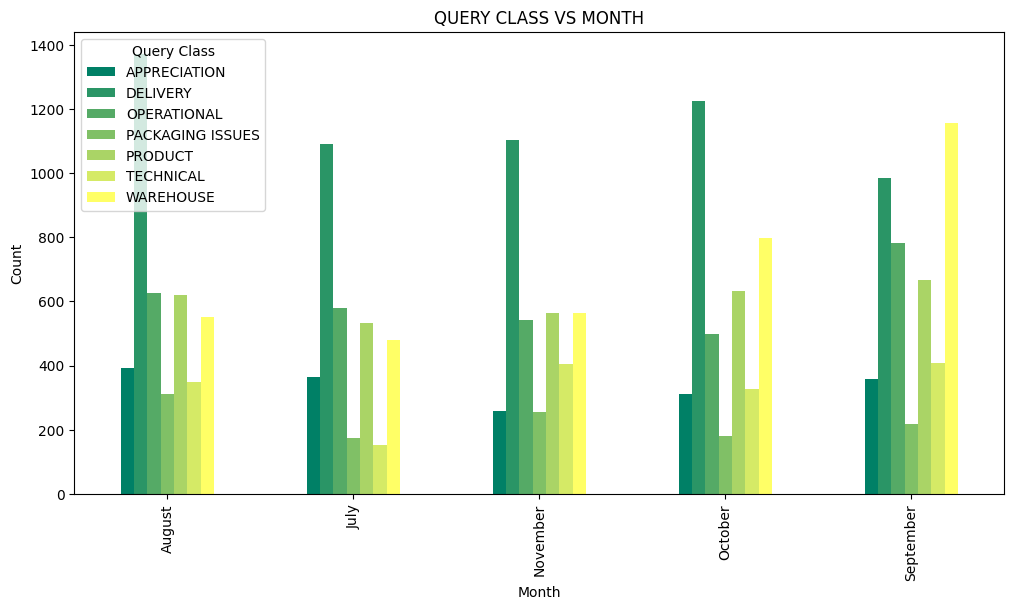

In [ ]:
import matplotlib.pyplot as plt
df_quantum=df.groupby("Month")["Query Class"].value_counts().unstack()
df_quantum.plot(kind="bar",figsize=(12,6),xlabel="Month",ylabel="Count",title="QUERY CLASS VS MONTH",cmap="summer")
plt.show()

###What is the quantum of complaints we received for the Batch - B220462?





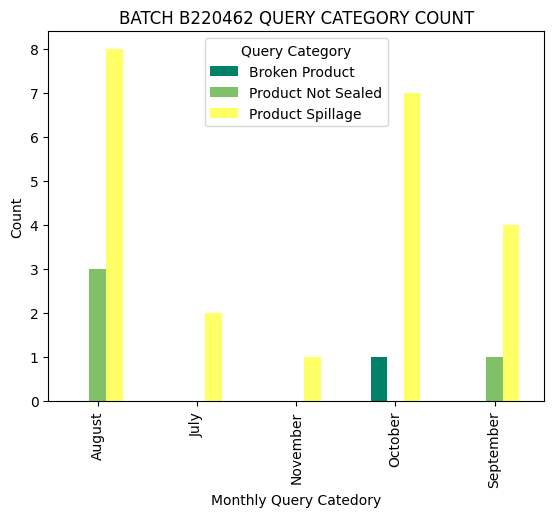

In [ ]:
batch=df[df["Batch Number/Fcailities"]=="B220462"]
df_batch=batch.groupby("Month")["Query Category"].value_counts().unstack()
df_batch.plot(kind='bar',xlabel="Monthly Query Catedory",ylabel="Count",title="BATCH B220462 QUERY CATEGORY COUNT",cmap="summer")
plt.show()




#What is the quantum of complaints excluding Appreciation?


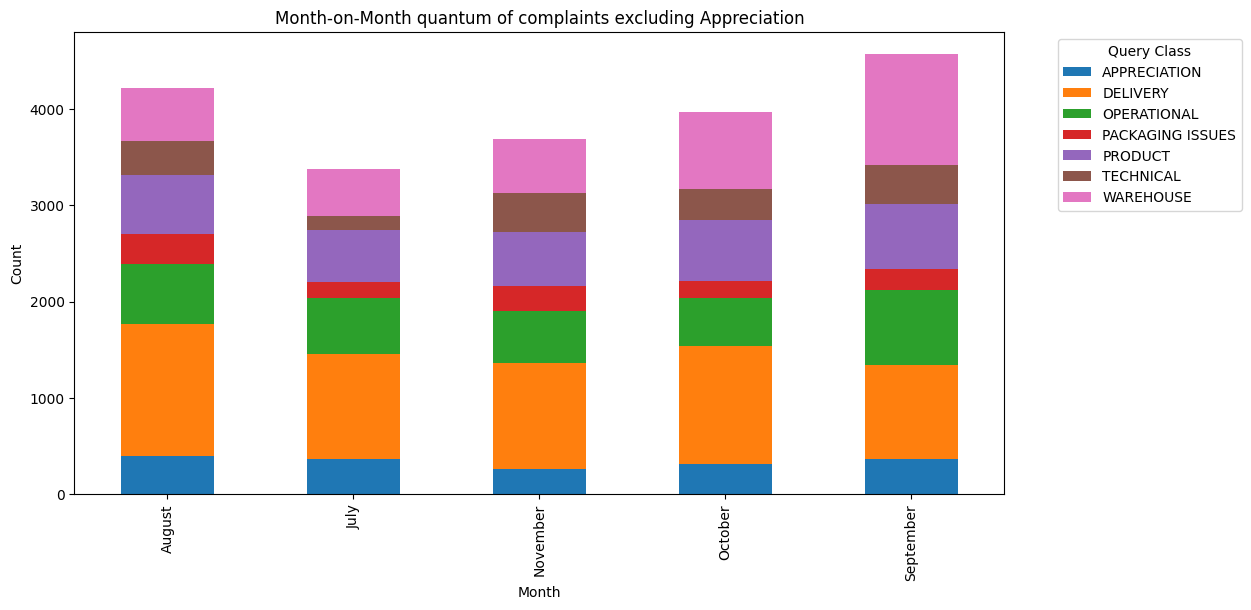

In [ ]:

df_filtered = df[df['Query Class'] != 'Appreciation']


query_class_counts = df_filtered.groupby(['Month', 'Query Class']).size().reset_index(name='Count')

pivot_df = query_class_counts.pivot(index='Month', columns='Query Class', values='Count').fillna(0)


pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Month-on-Month quantum of complaints excluding Appreciation')

plt.xlabel('Month')

plt.ylabel('Count')

plt.legend(title='Query Class', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#What is the quantum of delivery complaints (MOM) from July to November?


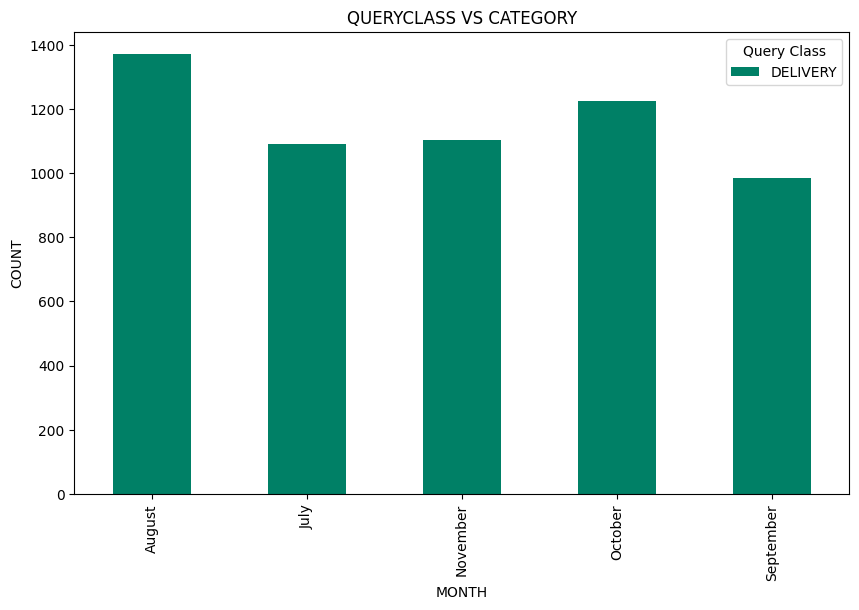

In [ ]:
delivery_df=df[df["Query Class"]=="DELIVERY"]
complaints= delivery_df.groupby("Month")["Query Class"].value_counts().unstack()
complaints.plot(kind="bar",xlabel="MONTH",ylabel="COUNT",title="QUERYCLASS VS CATEGORY",figsize=(10,6),cmap="summer")
plt.show()

#Which product has highest complaint from Batch - B002?


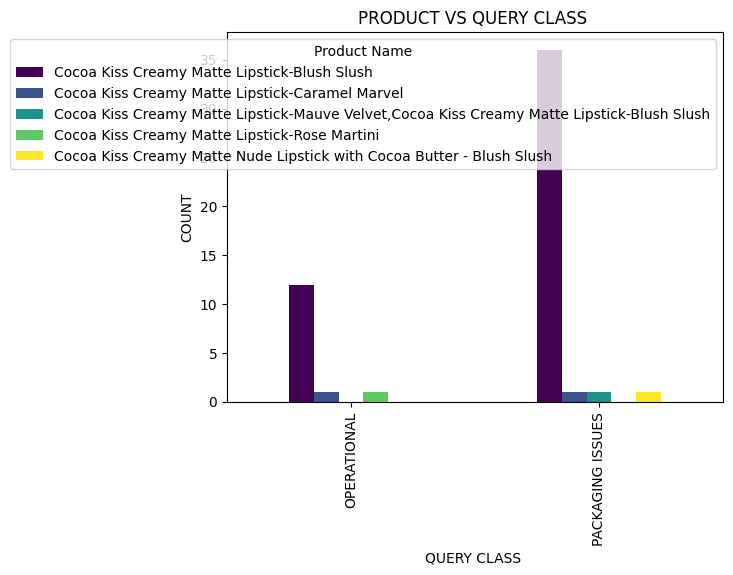

In [ ]:
batch=df[df["Batch Number/Fcailities"]=="B002"]
df_batch=batch.groupby("Query Class")["Product Name"].value_counts().unstack()
df_batch.plot(kind="bar",xlabel="QUERY CLASS ",ylabel="COUNT",title = "PRODUCT VS QUERY CLASS ",cmap= "viridis")
plt.show()

#What all are the Query Categories under Delivery Query Class and the quantum of each Query Category?


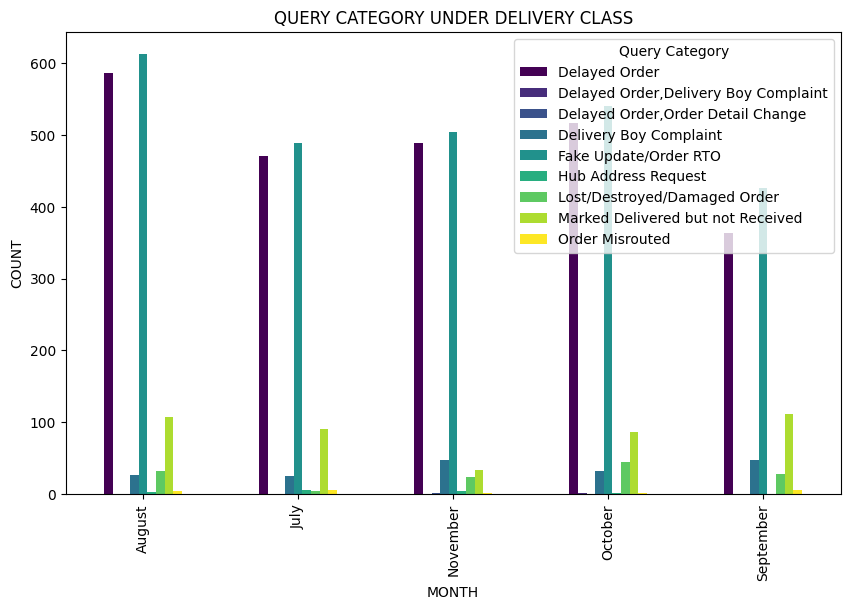

In [ ]:
new_df=df[df["Query Class"] == "DELIVERY"]
query_category=new_df.groupby("Month")["Query Category"].value_counts().unstack()
query_category.plot(kind="bar" , xlabel="MONTH",ylabel="COUNT",title ="QUERY CATEGORY UNDER DELIVERY CLASS",cmap="viridis",figsize=(10,6))
plt.show()


#Which Final-Class has the highest complaints?

> Indented block



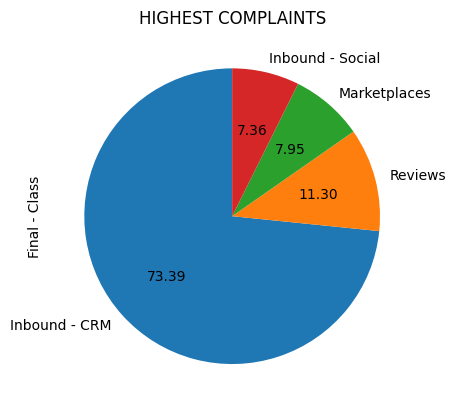

In [ ]:
Final_class=df["Final - Class"].value_counts()
Final_class.plot(kind="pie",autopct="%.2f",startangle=90 ,title= "HIGHEST COMPLAINTS")
plt.show()
